In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Defining functions That will be used to consturct the algorithm

In [66]:
def danglingNodeMatrix(matrix,zerocol,N):
    #zerocol: the column that consists of zeros only
    mat=matrix.copy()
    mat[:,zerocol]=1/N #changes the the zero column to 1/N
    return mat
def randomJumb(mat,N,beta):
    mat=beta*mat+((1-beta)/N) #applying the random jump
    # beta :weight of the actual out-links (between 0.8 to 0.9)
    # 1-beta: weight of the virtual links
    return mat
def rankCalculation(mat,N):
    error=0.0000001 #numerical error  
    r=np.empty(N) #1D array of size N
    for i in range(N):
        r[i]=1/N
    flag=False
    while flag==False:
        preRank=r.copy() #save the previous ranks in an array 
        for i in range(N):
            r[i]=np.sum(np.array([preRank[j]*mat[i][j] for j in range(N)]))
        if np.sum(np.array([abs(r[j]-preRank[j]) for j in range(N)]))<error: #compare previous rank with new one
            flag=True
    return r

# The Algorithm function

In [67]:
def pageRank(matrix,N,beta):
    dangling=0 #variable that will be used to detect dangling node
    for i in range(N):
        for j in range(N):
            if matrix[j][i]==0:
                dangling=dangling+1
        if dangling==N:
            matrix=danglingNodeMatrix(matrix,i,N)
            #if there is a dangling node
        dangling=0
    matrix=randomJumb(matrix,N,beta) 
    # applying random jump to overcome rank sink problem(no need to check if the rank sink problem exists or not as
    # the random jump works fine when applied ideal test cases as beta >> 1-beta ,as shown in the last testcase)
    rank=rankCalculation(matrix,N)
    return rank

In [68]:
def represent(x,labels,r,title,figureNum):
    plt.figure(figureNum)
    plt.xticks(x,labels,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('page number',fontsize=16,fontweight='bold')
    plt.ylabel('rank',fontsize=16,fontweight='bold')
    plt.ylim(0,1)
    plt.title(title,fontweight='bold',fontsize=16)
    plt.bar(x,r)    
def compare(x,r1,r2,xAxisLabels,label1,label2,figureNum):
    plt.figure(figureNum)
    plt.xticks(x,xAxisLabels,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('page number',fontsize=16,fontweight='bold')
    plt.ylabel('rank',fontsize=16,fontweight='bold')
    plt.title('Page Rank',fontsize=16,fontweight='bold')
    plt.scatter(x,r1,s=50,label=label1)
    plt.plot(x,r1,'--')
    plt.scatter(x,r2,s=50,label=label2)
    plt.plot(x,r2,'--')
    plt.legend()    

# Rank Sink Problem

## Test Case

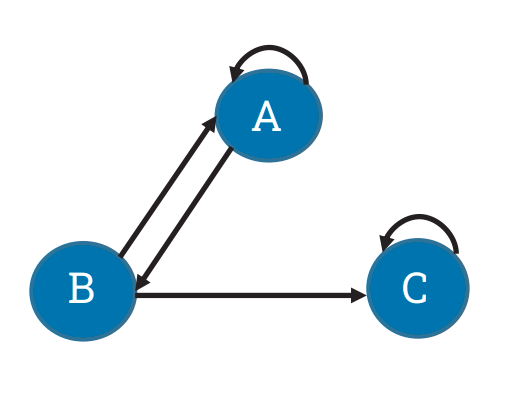

In [69]:
from IPython.display import Image
Image(filename='./images/1.png', width=320, height=250)
# The markdown format for adding pictures doesn't render in vs code, so that's a work around xD

## Inputs

In [70]:
N=3 #can be changed according to the test case
beta=0.8
mat=np.array([[0.5,0.5,0],[0.5,0,0],[0,0.5,1]]) #matrix of the test case for rank sink problem
x=np.linspace(1,N,N)
labels=['A','B','C']

### 1.Applying The Power Method Directly

Ranks of the pages in rank sink problem:  [1.13857538e-07 7.03678285e-08 9.99999816e-01]


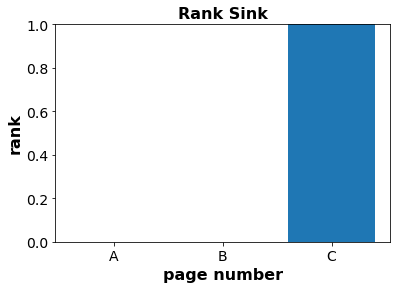

In [71]:
rank1=rankCalculation(mat,N)
represent(x,labels,rank1,title='Rank Sink',figureNum=1)
print("Ranks of the pages in rank sink problem: " , rank1)

### 2. Applying The Algorithm function

Correct ranks for rank sink problem:  [0.21212125 0.15151518 0.63636357]


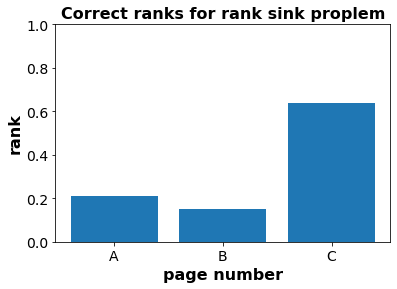

In [72]:
rank2=pageRank(mat,N,beta)
represent(x,labels,rank2,title='Correct ranks for rank sink proplem',figureNum=2)
print("Correct ranks for rank sink problem: " , rank2)

### Comparing The Results

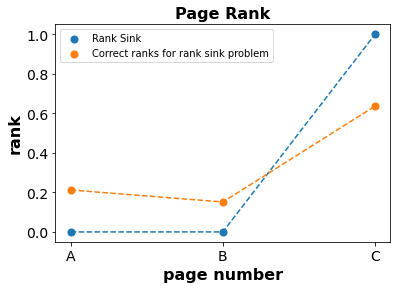

In [73]:
compare(x,rank1,rank2,labels,label1='Rank Sink',label2='Correct ranks for rank sink problem',figureNum=3)

# Dangling Node Problem

## Test Case

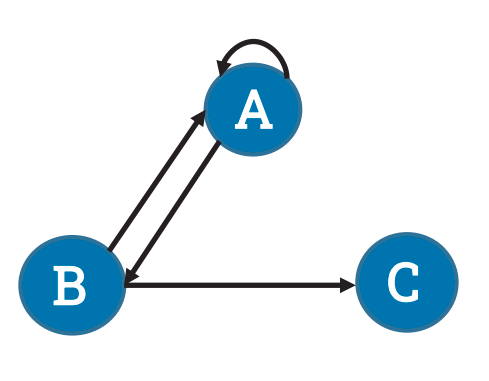

In [74]:
Image(filename='./images/2.png', width=320, height=250)

## Inputs

In [75]:
N=3 #can be changed according to the test case
beta=0.8
mat2=np.array([[0.5,0.5,0],[0.5,0,0],[0,0.5,0]]) #matrix of the test case for dangling node problem
x=np.linspace(1,N,N)
labels=['A','B','C']

### 1.Applying The Power Method Directly

Ranks of the pages in dangling node problem:  [1.73958839e-07 1.07512475e-07 6.64463638e-08]


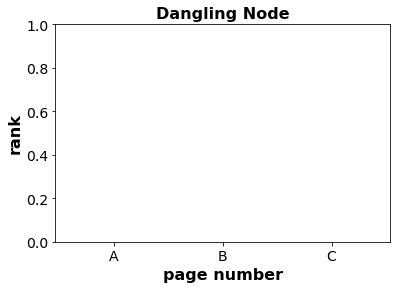

In [76]:
rank3=rankCalculation(mat2,N)
represent(x,labels,rank3,title='Dangling Node',figureNum=4)
print("Ranks of the pages in dangling node problem: " , rank3)

### 2.Applying The Random Jump Method

Ranks of the pages in random jump applied on dangling node:  [1.70955385e-07 1.14598342e-07 8.68831393e-08]


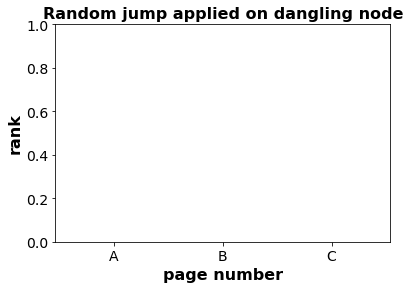

In [77]:
mat3=randomJumb(mat2,N,beta)
rank4=rankCalculation(mat3,N)
represent(x,labels,rank4,title='Random jump applied on dangling node',figureNum=5)
print("Ranks of the pages in random jump applied on dangling node: " , rank4)

### 3. Applying The Algorithm function

Correct ranks for dangling node problem:  [0.43209877 0.30864196 0.25925927]


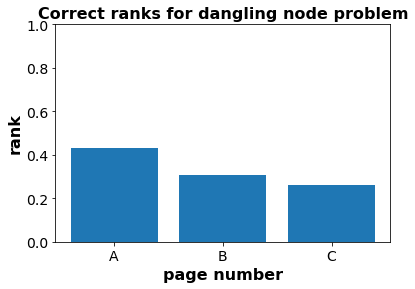

In [78]:
rank5=pageRank(mat2,N,beta)
represent(x,labels,rank5,title='Correct ranks for dangling node problem',figureNum=6)
print("Correct ranks for dangling node problem: " , rank5)

### Compring The Results

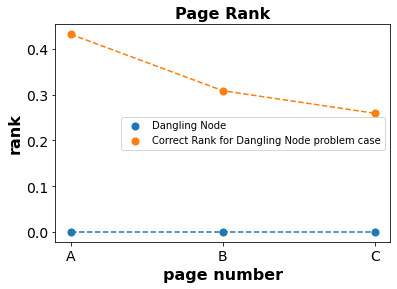

In [79]:
compare(x,rank3,rank5,labels,label1='Dangling Node',label2='Correct Rank for Dangling Node problem case',figureNum=7)

# Ideal Test Case

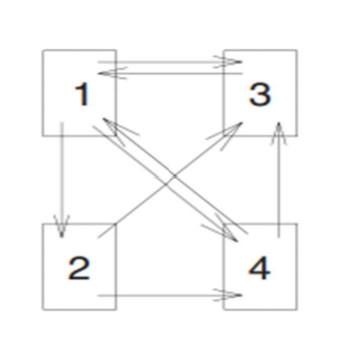

In [80]:
Image(filename='./images/3.jpeg', width=250, height=250)

## Inputs

In [81]:
N2=4
matIdeal=np.array([[0,0,1,0.5],[1/3,0,0,0],[1/3,0.5,0,0.5],[1/3,0.5,0,0]])
x2=np.linspace(1,N2,N2)
labels2=['A','B','C','D']

### 1.Applying Power Method Directly

Ranks for the ideal test case using the power method directly:  [0.38709678 0.12903226 0.29032257 0.19354838]


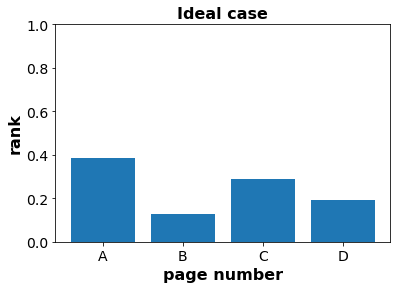

In [82]:
rank6=rankCalculation(matIdeal,N2)
represent(x2,labels2,rank6,title="Ideal case",figureNum=8)
print("Ranks for the ideal test case using the power method directly: ",rank6)

### 2. Applying The Algorithm function

Ranks for the ideal test case using the modified algorithm:  [0.36159062 0.14642417 0.28699137 0.20499384]


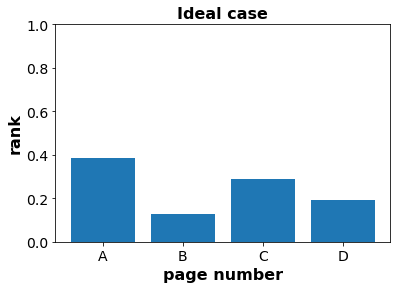

In [83]:
rank7=pageRank(matIdeal,N2,beta)
represent(x2,labels2,rank6,title="Ideal case",figureNum=8)
print("Ranks for the ideal test case using the modified algorithm: ",rank7)

### Comparing The Results

(0.0, 1.0)

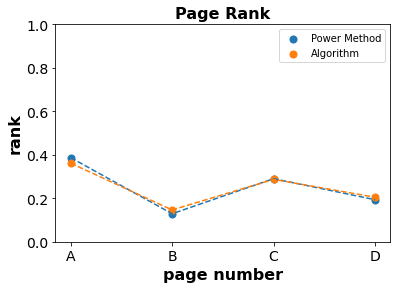

In [84]:
compare(x2,rank6,rank7,labels2,label1='Power Method',label2='Algorithm',figureNum=3)
plt.ylim(0,1)